In [1]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import pickle
%matplotlib inline

c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\users\choi seung un\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
use_col = ['AGE_CD', 'GENDER', 'BAS_MON', 'TRANS_MD', 'ATS_KDCD_DTL', 'DPS_TRN_AM', 'TEXTS_2', 'WEEKDAY']
df = pd.read_csv('../../data/wondata.csv', encoding="utf-8-sig", index_col=0)

categorical = [0, 1, 2, 3, 4, 6, 7]
# 사용컬럼 : 나이대, 성별, 거래월, 입출금, ATS, 금액, 적요, 평일주말
uid  = df['UID']
df = df[use_col]
df

,AGE_CD,GENDER,BAS_MON,TRANS_MD,ATS_KDCD_DTL,DPS_TRN_AM,TEXTS_2,WEEKDAY
2029422,7,1,3,1,9,1,0,0
2029423,9,1,4,1,9,3,0,0
2029439,6,1,3,1,9,4,0,0
2029456,7,1,5,1,9,2,0,0
2029458,7,2,5,1,9,3,0,0
...,...,...,...,...,...,...,...,...
2029409,9,1,6,2,1,1,1,0
2029411,4,2,2,2,6,5,1,0
2029413,6,2,3,2,6,4,1,0
2029415,9,1,4,2,6,6,1,0


  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

first cluster 12


  8%|██████▍                                                                            | 1/13 [00:29<05:56, 29.73s/it]

now_gradient -207136.0


 15%|████████████▊                                                                      | 2/13 [00:57<05:13, 28.52s/it]

now_gradient 4626.0
save ../../model/k_20230127_13.pickle


 23%|███████████████████▏                                                               | 3/13 [01:25<04:45, 28.50s/it]

now_gradient 2458.0


 31%|█████████████████████████▌                                                         | 4/13 [01:55<04:19, 28.79s/it]

now_gradient 1704.0


 38%|███████████████████████████████▉                                                   | 5/13 [02:24<03:52, 29.05s/it]

now_gradient 735.0


 46%|██████████████████████████████████████▎                                            | 6/13 [02:50<03:16, 28.02s/it]

now_gradient -1707.0


 54%|████████████████████████████████████████████▋                                      | 7/13 [03:16<02:43, 27.28s/it]

now_gradient 849.0


 62%|███████████████████████████████████████████████████                                | 8/13 [03:49<02:25, 29.01s/it]

now_gradient 3628.0


 69%|█████████████████████████████████████████████████████████▍                         | 9/13 [04:16<01:53, 28.47s/it]

now_gradient -2812.0


 77%|███████████████████████████████████████████████████████████████                   | 10/13 [04:44<01:25, 28.38s/it]

now_gradient 336.0


 85%|█████████████████████████████████████████████████████████████████████▍            | 11/13 [05:13<00:57, 28.59s/it]

now_gradient 857.0


 92%|███████████████████████████████████████████████████████████████████████████▋      | 12/13 [05:49<00:30, 30.91s/it]

now_gradient 4311.0


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [06:26<00:00, 29.75s/it]

now_gradient 549.0


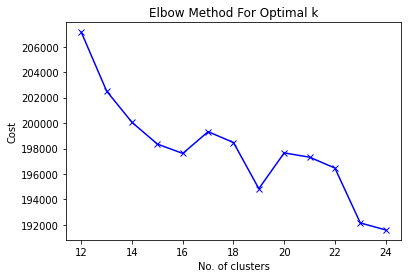

In [6]:
cost = [0]
K = list(range(12, 25))
best_gradient = cost[0]
best_cluster = K[0]
file = '../../model/k_{}.pickle'
print("first cluster", best_cluster)

for num_clusters in tqdm(list(K)):
    kmodel = KModes(n_clusters=num_clusters, n_jobs=-1, verbose=0)
    kmodel.fit_predict(df)

#     kmodel = KPrototypes(n_clusters=num_clusters, n_jobs=-1, verbose=0)
#     kmodel.fit(df, categorical=categorical)

    now_gradient = cost[-1] - kmodel.cost_
    print('now_gradient', now_gradient)
    
    # 이전 모델보다 기울기가 크면
    if now_gradient > best_gradient:
        # 이전 모델삭제
        if os.path.isfile(file.format(str(best_cluster))):
            print("remove %s"%file.format(str(best_cluster)))
            os.remove(file.format(str(best_cluster)))
        # 새롭게 저장
        best_cluster = num_clusters
        print("save %s"%file.format(str(best_cluster)))
        with open(file.format(str(best_cluster)), "wb") as fw:
            pickle.dump(kmodel, fw)
        best_gradient = now_gradient
    cost.append(kmodel.cost_)

plt.plot(K, cost[1:], 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()